###### Project by - Shivani Bhatia
###### Topic Covered - Multiple Linear Regression
###### Submitted as a part of Multiple Linear Regression Assignment for IIIT B and Upgrad Executive PG in AI and ML Programme.

# PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Dictionary

The dataset day.csv have the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Approach to Problem Statement

In [147]:
# 1. Data understanding and data loading:
    #day.csv--> Dataset
    #html link--->Data Dictionary
# 2. Pre- Processing:
    #Drop casual and registered columns (since cnt is sum of casual and registered)
    #Map values of categorical variable from data dictionary e.g.season
    #check missing values
# 3. EDA :
    #univariate analysis....mandatory
    #bivariate analysis.....mandatory
    #multivariate analysis....optional
# 4. Creating Dummy Variable:
    #Create dummy variables for all categorical variables of categories > 2
# 5.Train-Test Split:
    #70:30 splitting method for train and test data
    #Check Missing value again (if any)
# 6. Scaling (Mandatory for linear models):
    #fit transform (train data)
    #transform (test data)
# 7. Feature Selection:
    #Automated (RFE)...............................................30f
    #Manual (p-value +VIF)---->One by one variable.................15f
    #Hybrid (Automatic + Manual).....................................10f
    #find cutoff of P value (p-value <0.05)
    #cutoff of vif is 5 (VIF <=5)
# 8. Model Building
# 9. Residual Analysis of Training Data
# 10. Evaluation (Test Data)
    #R square
    #Adjusted R-square ..............80-85% for train-test both

#### Linear regression models are based on several key assumptions

By the end of this project the predicted multiple linear regression model should abide by following :

1. Linearity: The relationship between the independent and dependent variables is assumed to be linear.

2. Independence: Residuals (the differences between observed and predicted values) should be independent of each other.

3. Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables, indicating consistent levels of variability.

4. Normality of Residuals: The residuals should be approximately normally distributed.

5. No Perfect Multicollinearity: Independent variables should not exhibit high correlation with each other, avoiding multicollinearity issues.

# 1. Data Loading and Understanding

#### To understand the data we would look answers for following 7 question:
     1. How big is the data? - df.shape
     2. How does the data look like? -  df.head() and df.sample()
     3. What is the data type of each columns? - df.info()
     4. Are there any missing values? - df.isnull().sum()
     5. How does the data look mathematically? - df.describe()
     6. Are there duplicate values? - df.duplicated().sum()
     7. How is the correlation between the columns? - df.corr() #this during analysis part after data cleaning.

In [56]:
#import libraries
import calendar
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [57]:
#Read data

bbikes_df=pd.read_csv(r"C:\Users\ADMIN\Desktop\Bike_Sharing_Assignment\day.csv")
bbikes_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [58]:
#Check no. of rows and columns of data

bbikes_df.shape

(730, 16)

In [59]:
#Check size of data

bbikes_df.size

11680

In [60]:
bbikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [61]:
bbikes_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [62]:
#Describe your data

bbikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [63]:
#Check data info

bbikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# 2. Pre- Processing

In [64]:
# Dropping unnecessary columns
# Instant column as it is merely a index column which has no significance for our target
# Dteday is not useful as month and weekday are covering it
# Removing casual and registered as cnt is sum of these

bbikes_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [65]:
bbikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [66]:
# Map values of categorical variables
bbikes_df.season = bbikes_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bbikes_df.mnth=bbikes_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bbikes_df.weekday=bbikes_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bbikes_df.weathersit=bbikes_df.weathersit.map ({ 1: 'Good', 2: 'Moderate', 3: 'Bad', 4: 'Severe' })

In [67]:
# Confirm using the above values to ensure successful conversion.
bbikes_df['weathersit'].value_counts(ascending = False)

weathersit
Good        463
Moderate    246
Bad          21
Name: count, dtype: int64

In [68]:
# Confirm using the above values to ensure successful conversion.
bbikes_df['weekday'].value_counts(ascending = False)

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

In [69]:
# Confirm using the above values to ensure successful conversion.
bbikes_df['mnth'].value_counts(ascending = False)

mnth
jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: count, dtype: int64

In [70]:
# Confirm using the above values to ensure successful conversion.
bbikes_df['season'].value_counts(ascending = False)

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [71]:
# Inspecting the values in the dataframe after data conversion
bbikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [72]:
bbikes_df.isnull().sum

<bound method DataFrame.sum of      season     yr   mnth  holiday  weekday  workingday  weathersit   temp  \
0     False  False  False    False    False       False       False  False   
1     False  False  False    False    False       False       False  False   
2     False  False  False    False    False       False       False  False   
3     False  False  False    False    False       False       False  False   
4     False  False  False    False    False       False       False  False   
..      ...    ...    ...      ...      ...         ...         ...    ...   
725   False  False  False    False    False       False       False  False   
726   False  False  False    False    False       False       False  False   
727   False  False  False    False    False       False       False  False   
728   False  False  False    False    False       False       False  False   
729   False  False  False    False    False       False       False  False   

     atemp    hum  windspeed    

# 3.Exploratory Data Analysis

In [73]:
# Checking for duplicates in the dataset
bbikes_df.drop_duplicates(inplace = True)
# Verifying the shape of the dataframe
bbikes_df.shape

(730, 12)

In [74]:
# Checking out the columns present in the dataframe
bbikes_df.columns.sort_values()

Index(['atemp', 'cnt', 'holiday', 'hum', 'mnth', 'season', 'temp',
       'weathersit', 'weekday', 'windspeed', 'workingday', 'yr'],
      dtype='object')

In [75]:
bbikes_df.shape


(730, 12)

#### 3.1 Univariate Analysis

In [76]:
#defining categorical and continous columns of data
#categorical_columns = {'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'}
#continuous_columns = {'temp', 'atemp', 'hum', 'windspeed', 'cnt'}

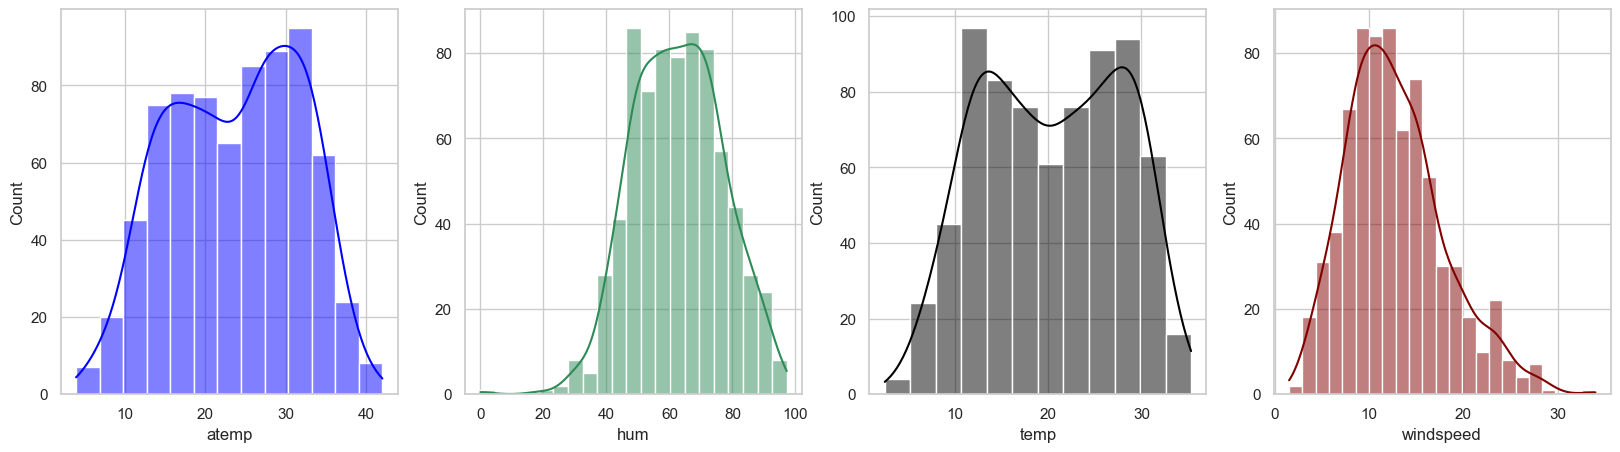

In [77]:
# Analysing the continuous (numerical) variables

continuous_config = {
    'atemp': { 'color': 'blue' },
    'hum': { 'color': 'seagreen' },
    'temp': { 'color': 'black' },
    'windspeed': { 'color': 'maroon'}
}

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

for i, (cont, config) in enumerate(continuous_config.items()):
    sns.histplot(data = bbikes_df, x = cont, ax = ax[i], color = config['color'], kde = True)

plt.show()

### Infrence :  
    # Maximum bikes were rented at temperature (temp) of 12.5 °C.
    # The average feeling temperature (atemp) during bike rentals is approximately 24°C.
    # Humidity (hum) averaged around 60 during bike rentals.
    # The average windspeed (windspeed) during bike rentals is approximately 12.

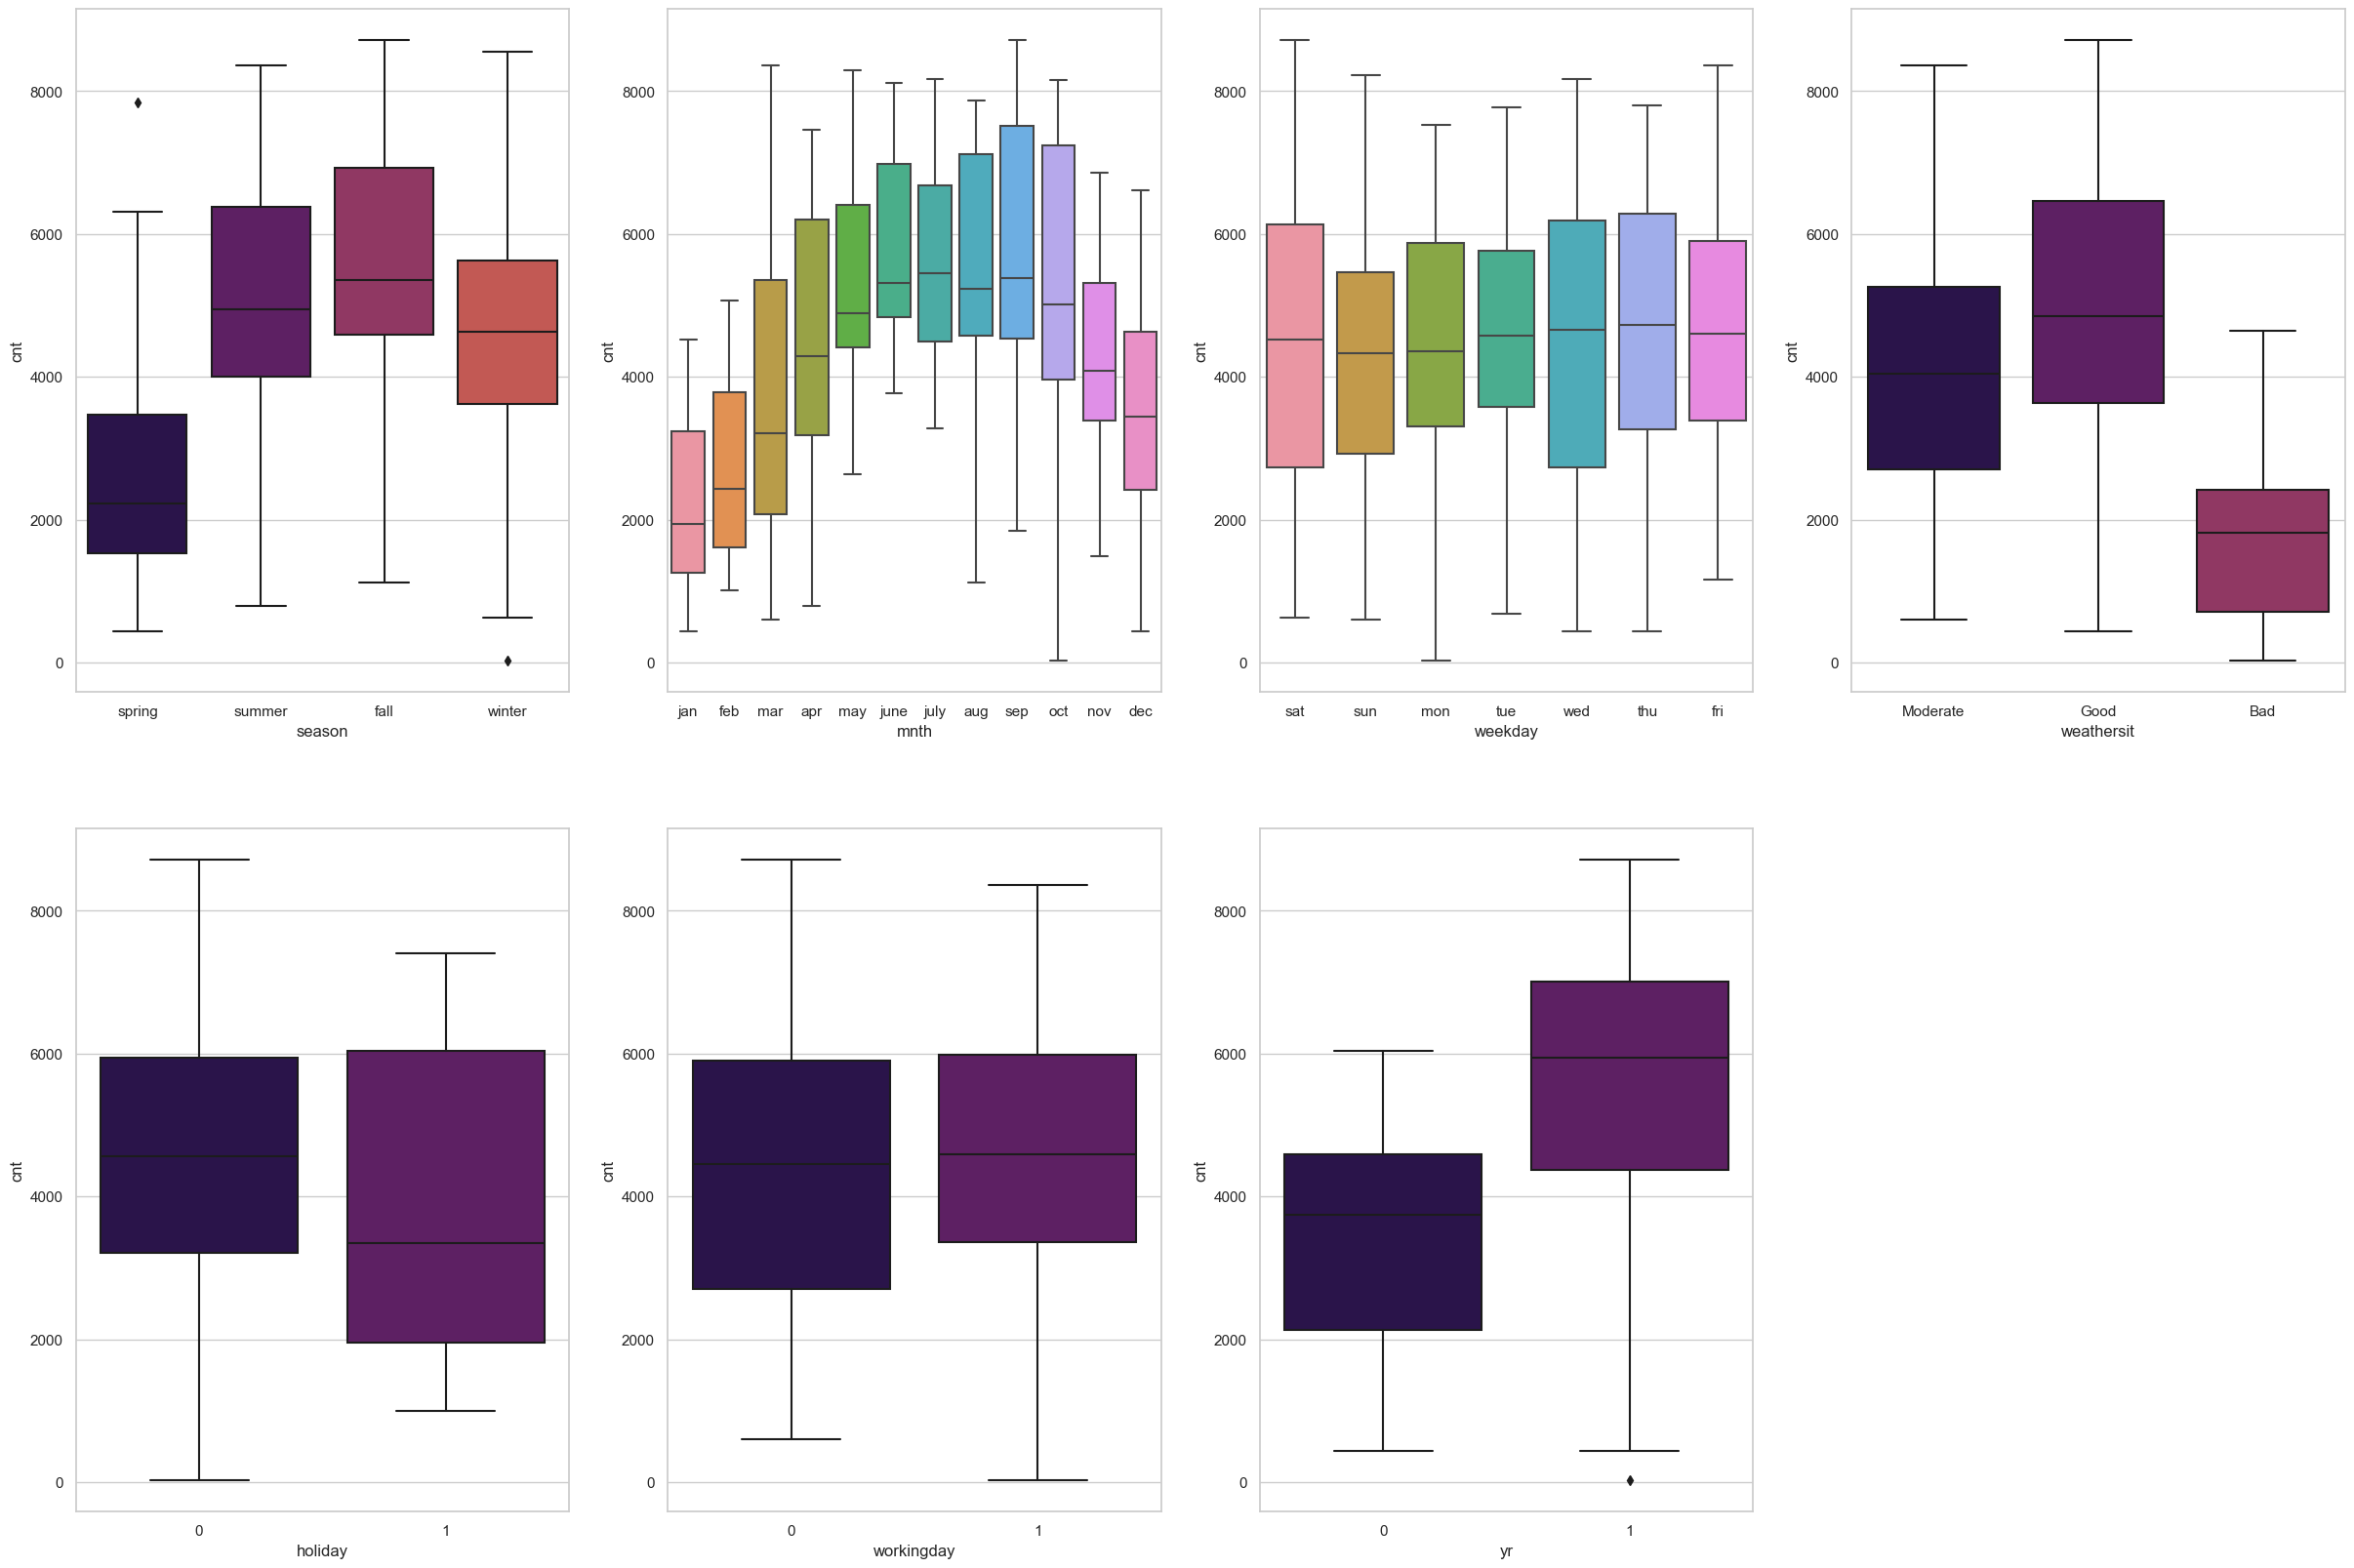

In [78]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

# Setting the style and color palette
sns.set(style="whitegrid")
sns.set_palette('inferno')

plt.figure(figsize=(30, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bbikes_df )
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bbikes_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bbikes_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bbikes_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bbikes_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bbikes_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bbikes_df)
plt.show()

### Infrences:
    # Maximum rentals were in the season of fall.
    # Bike rentals are more frequent in favorable weather.
    # Preference for bike rentals is observed on working days and non-holidays.
    # Bike rentals were more in 2019 compared to previous year.



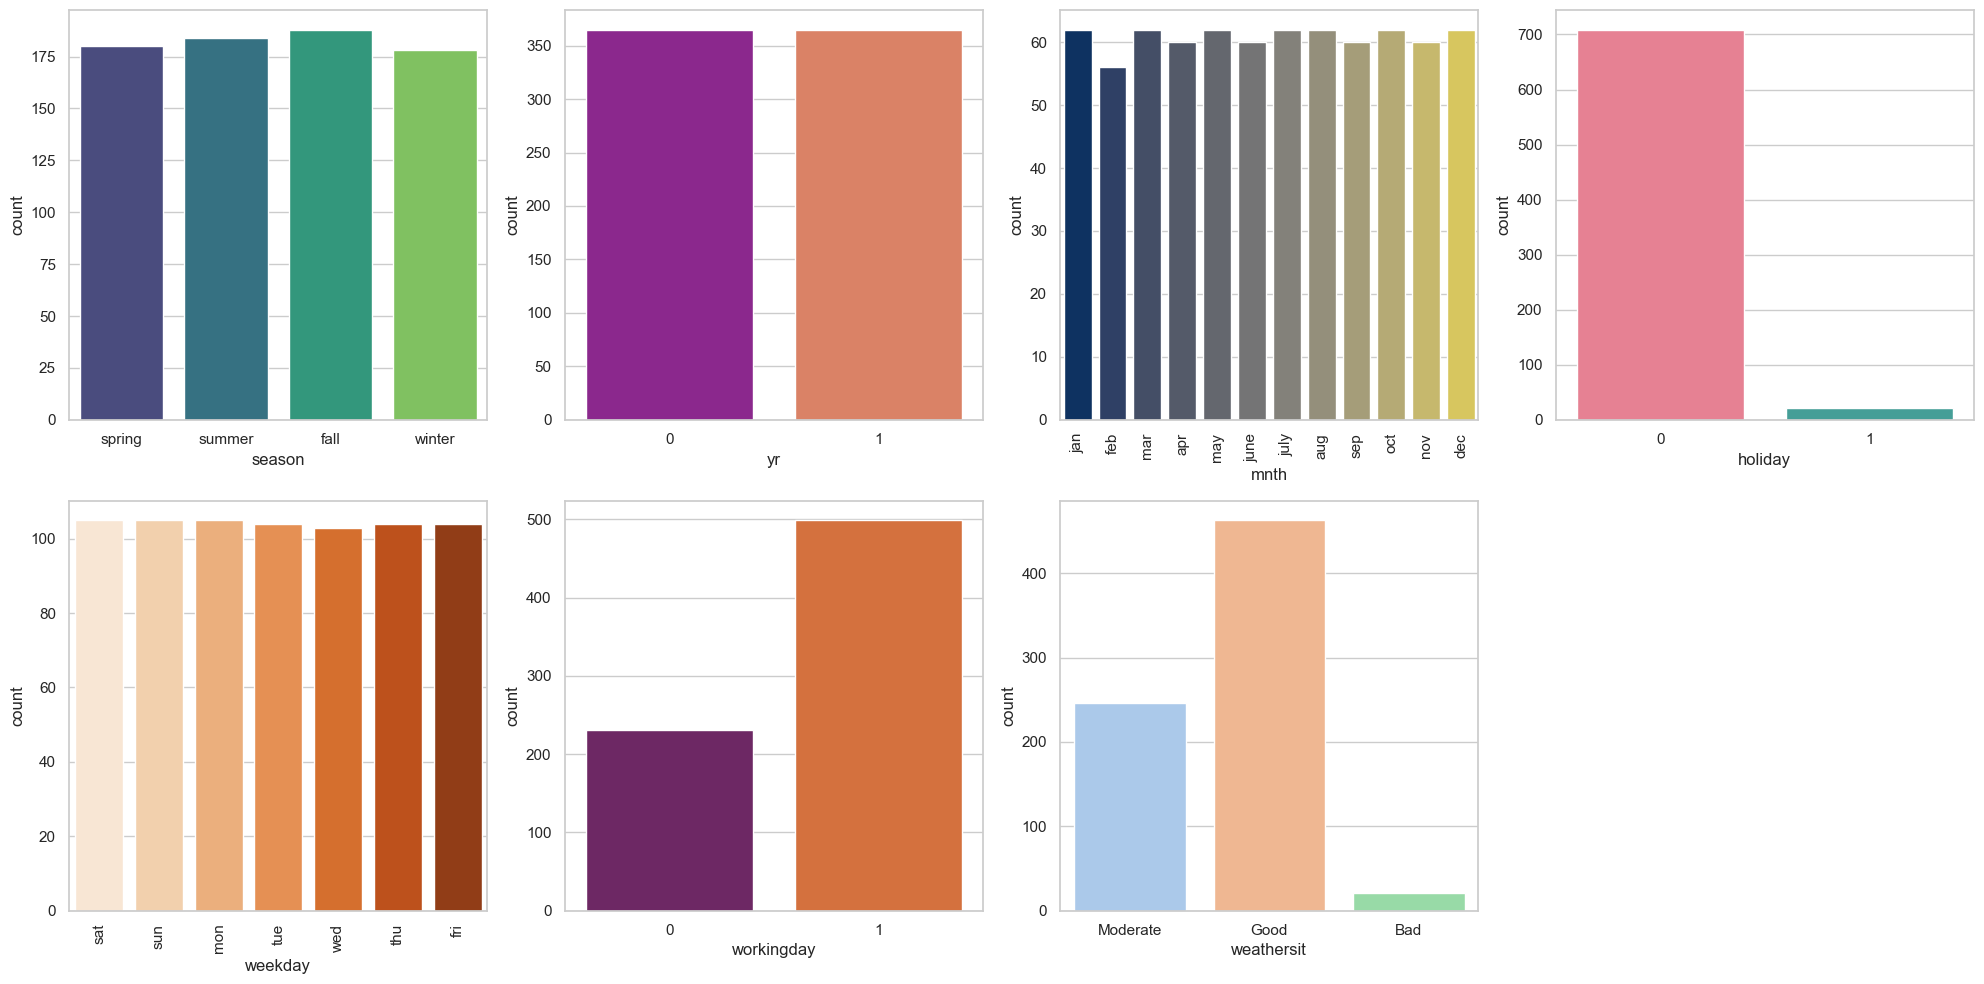

In [79]:
# Also visualizing it in boxplots
categorical_config = {
    'season': { 'rotation': 0, 'palette': 'viridis' },
    'yr': { 'rotation': 0, 'palette': 'plasma' },
    'mnth': { 'rotation': 90, 'palette': 'cividis' },
    'holiday': { 'rotation': 0, 'palette': 'husl' },
    'weekday': { 'rotation': 90, 'palette': 'Oranges' },
    'workingday': { 'rotation': 0, 'palette': 'inferno' },
    'weathersit': { 'rotation': 0, 'palette': 'pastel' }
}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, (cat, config) in enumerate(categorical_config.items()):
    sns.countplot(data = bbikes_df, x = cat, palette = config['palette'], ax = ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xticklabels(ax[i // 4, i % 4].get_xticklabels(), rotation = config['rotation'])

# Hide the last column
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()

## 3.2 Bivariate Analysis

#### 3.2.1 Continous Columns

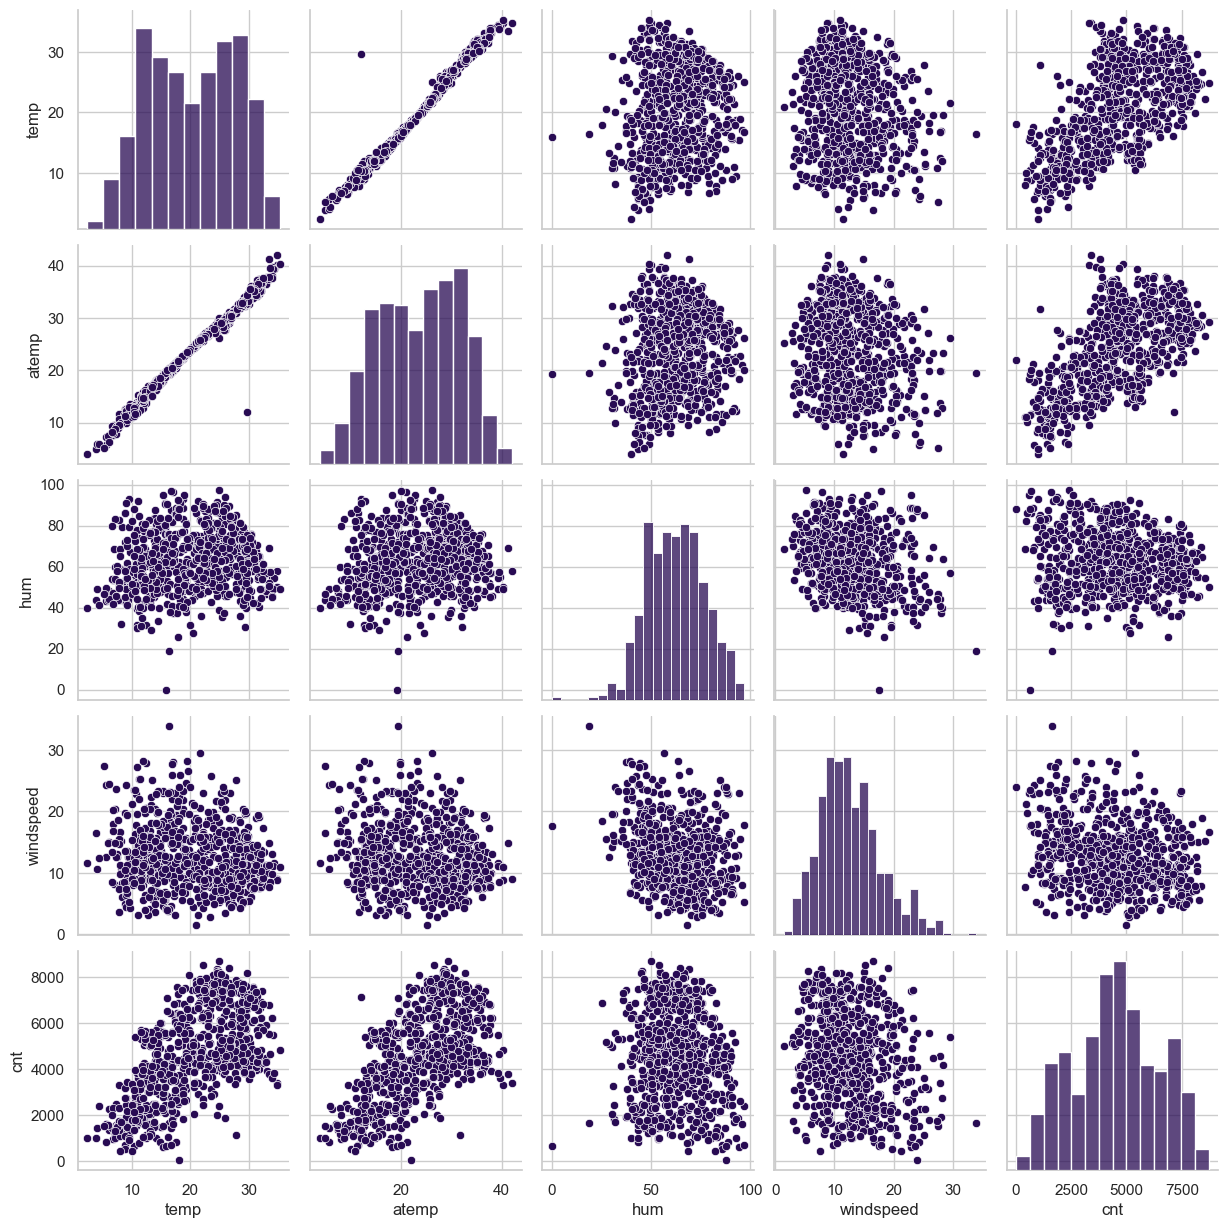

In [80]:
# Analysing/visualizing the continous columns
sns.pairplot(data=bbikes_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Infrence: 

    # Atemp and Temp shows strong correlation with each other.

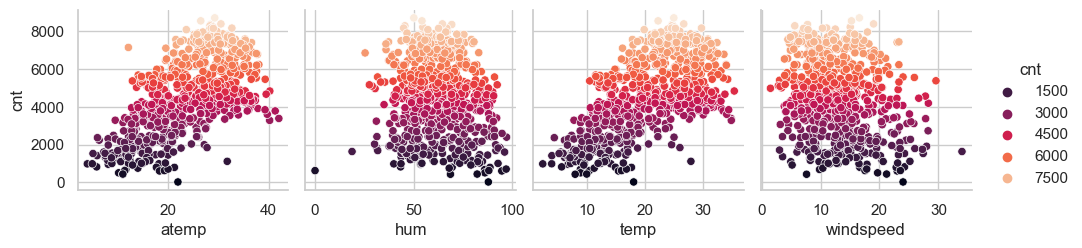

In [81]:
# Draw pairplot for continuous independent numeric variables against a dependent variable `cnt`
sns.pairplot(data = bbikes_df, x_vars = list(continuous_config.keys()), y_vars = ['cnt'], hue = 'cnt', palette = 'rocket')
plt.show()

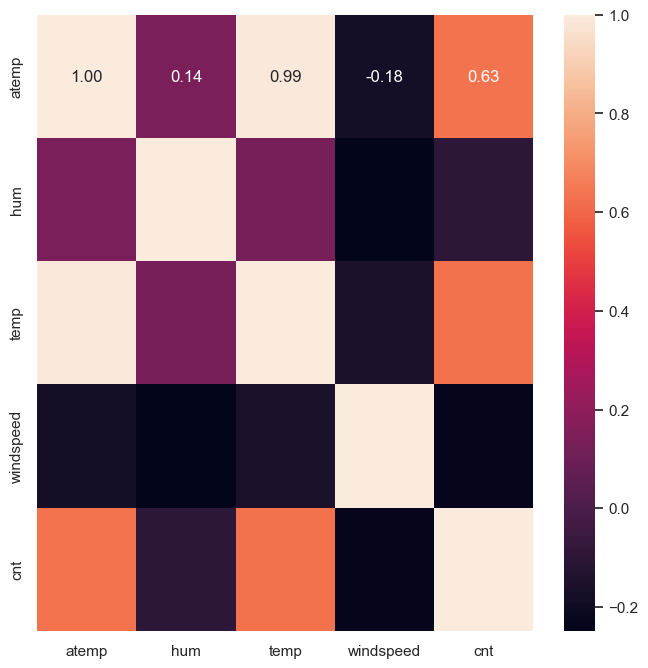

In [82]:
plt.figure(figsize = (8, 8))
corr_df = bbikes_df[list(continuous_config.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'rocket',fmt= ".2f")
plt.show()

### Infrences:
    # atemp and temp exhibit a strong correlation with cnt, indicating that favorable temperatures are conducive to biking.
    # atemp and temp show a strong correlation, suggesting potential redundancy. Consider employing feature elimination to assess and remove one of them.
    # windspeed and hum is negatively correlated with bike rentals, indicating unfavorable biking condition

#### 3.2.2 Categorical Columns

In [83]:
#Analysing categorical columns
def plot_cat_columns(column):
    try: 
        plt.figure(figsize=(10, 6))
        
        # Plot without hue
        plt.subplot(1, 2, 1)
        sns.barplot(x=column, y='cnt', data=bbikes_df)
        
        # Plot with hue
        plt.subplot(1, 2, 2)
        sns.barplot(x=column, y='cnt', data=bbikes_df, hue='yr', palette='inferno')
        #plt.legend(labels=['2018', '2019'],loc='upper right')
        plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

An error occurred: 'numpy.int64' object has no attribute 'startswith'


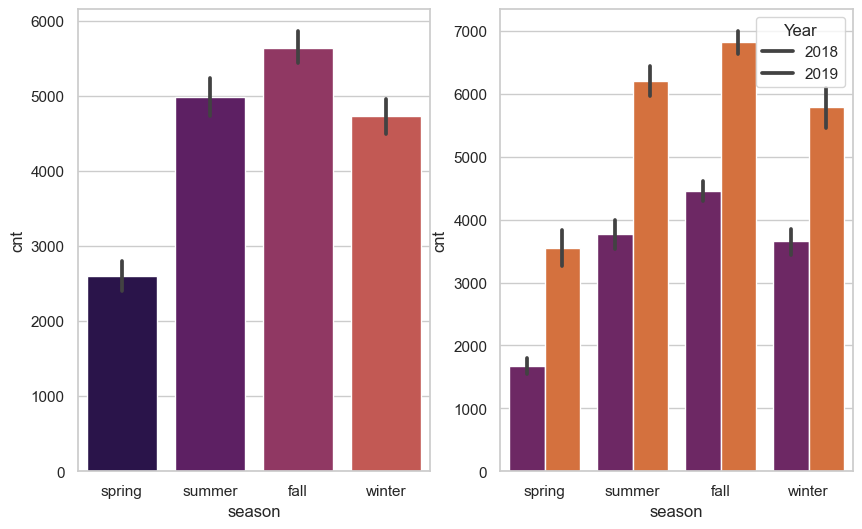

In [84]:
# Assuming bbikes_df is already defined and contains the appropriate columns.
plot_cat_columns('season')
plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
plt.show()

### Infrences: 
        # Bike rentals were maximum in fall season and in year 2019.

An error occurred: 'numpy.int64' object has no attribute 'startswith'


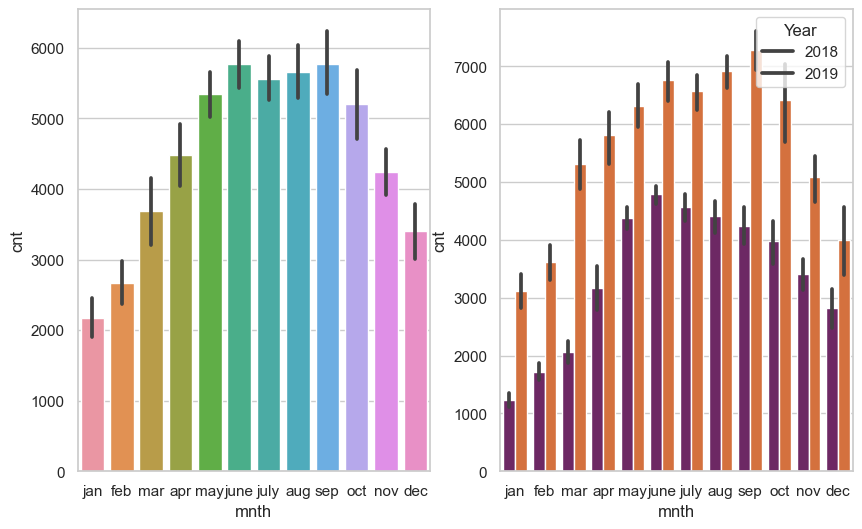

In [85]:
# plotting visualization for month column

plot_cat_columns('mnth')
plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
plt.show()


### Infrences: 
        #Bike rentals were highest in september for year 2019

An error occurred: 'numpy.int64' object has no attribute 'startswith'


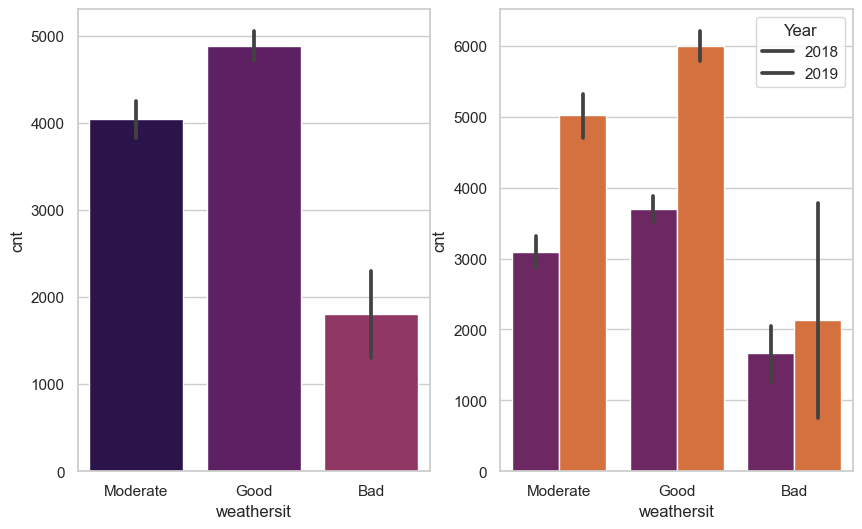

In [86]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')
plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
plt.show()

### Infrences: 
        #Bike rentals were highest in good weather situation for year 2019

An error occurred: 'numpy.int64' object has no attribute 'startswith'


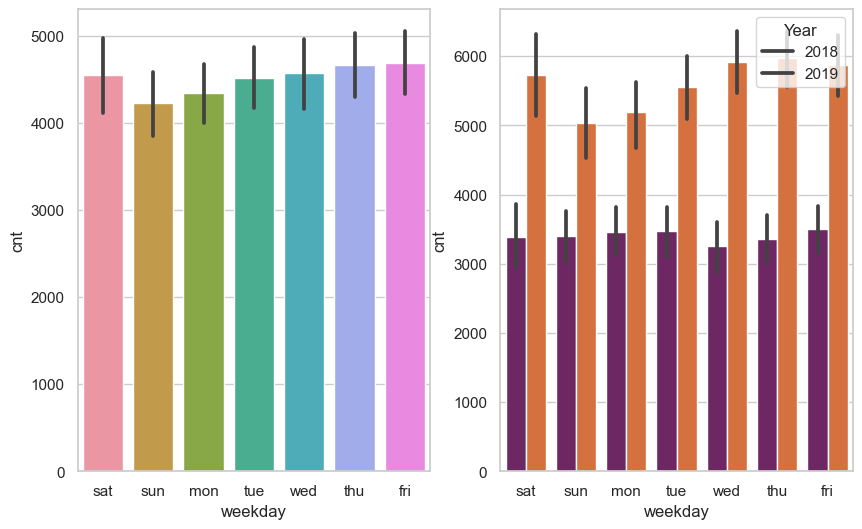

In [87]:
# plotting visualization for weekday column

plot_cat_columns('weekday')
plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
plt.show()

### Infrences: 
        # Bike rentals were highest on thrusday for year 2019.

An error occurred: 'numpy.int64' object has no attribute 'startswith'


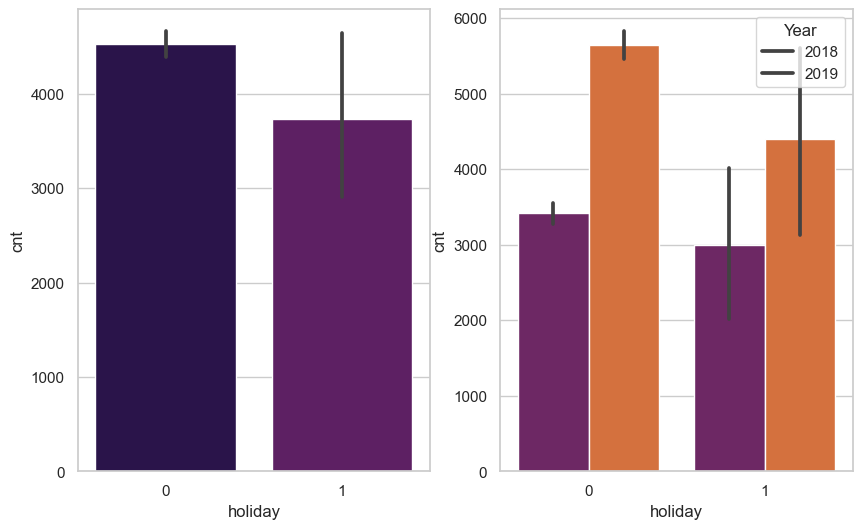

In [88]:
# plotting visualization for holiday column

plot_cat_columns('holiday')
plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
plt.show()

### Infrences: 
        # Bike rentals were highest on a non-holiday for year 2018.

An error occurred: 'numpy.int64' object has no attribute 'startswith'


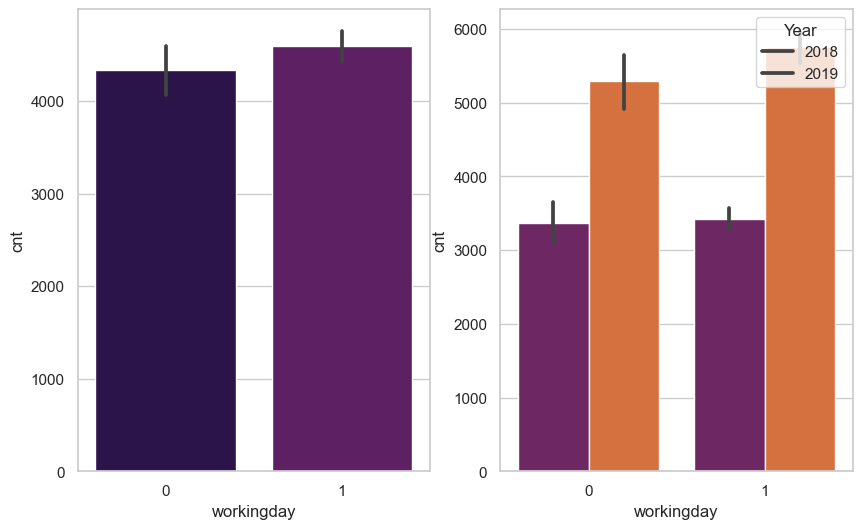

In [89]:
# plotting visualization for workingday column
plot_cat_columns('workingday')
plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')
plt.show()

### Infrences: 
        # Bike rentals were high for a working day for year 2019.

In [90]:
# Correlation between numerical variables
bbikes_df[list(continuous_config.keys()) + ['cnt']].corr(numeric_only = True)

,atemp,hum,temp,windspeed,cnt
atemp,1.000000,0.141512,0.991696,-0.183876,0.630685
hum,0.141512,1.000000,0.128565,-0.248506,-0.098543
temp,0.991696,0.128565,1.000000,-0.158186,0.627044
windspeed,-0.183876,-0.248506,-0.158186,1.000000,-0.235132
cnt,0.630685,-0.098543,0.627044,-0.235132,1.000000


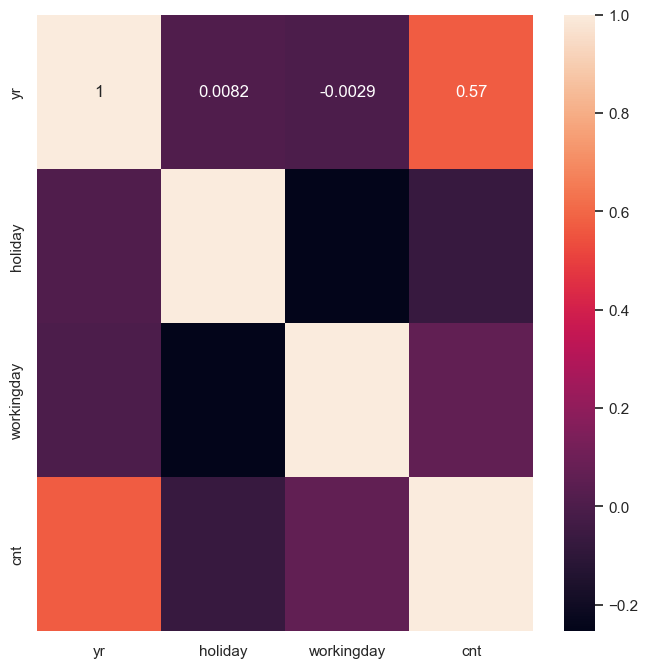

In [91]:
# Verifying the correlation
plt.figure(figsize = (8, 8))
corr_df = bbikes_df[list(categorical_config.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'rocket')
plt.show()

### Infrence:
    # yr is having the best positive correlation among all categorical variables.

### 3.3 Multivariate Analysis

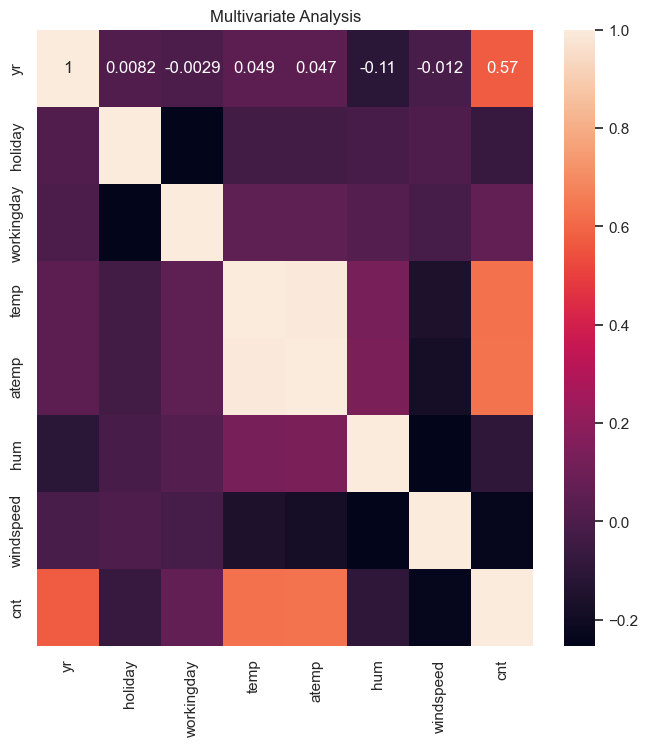

In [92]:
#Correlation amongst all variable of the data

plt.figure(figsize = (8, 8))
sns.heatmap(bbikes_df.corr(numeric_only = True), annot = True, cmap = 'rocket')

plt.title("Multivariate Analysis")
plt.show()

### Infrence:
    # There is a negative correlation between cnt and certain variables, specifically holiday, hum, and windspeed.
    # On the contrary, there is a positive correlation between cnt and other variables, namely yr, workingday, temp, and atemp.
    # The high correlation observed between temp and atemp further supports our initial observation that they are nearly identical.

# 4. Creating Dummy Variable

Dummy variables, or indicator variables, convert categorical data into numeric format for machine learning models. Dummy variables are only required if the categorical values are more than 2 unique values. They dummy variables are always number of unique values - 1. We can drop any column, but generally, we drop the first column. Here we create a new column for each category, assigning a 1 or 0 to indicate the presence of that category. Dummy variables help in performing regression analysis and other statistical methods where categorical data is required to be numeric.

In [93]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bbikes_df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [94]:
# Only the categorical variables - season, mnth, weekday, and weathersit, among those mentioned, have more than 2 unique values.
# Dummy variables will be created exclusively for these columns.

In [95]:
bbikes_df = pd.get_dummies(data = bbikes_df, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True, prefix = '', prefix_sep = '')

In [96]:
bbikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Good,Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,True,False


# 5. Train-Test Split

In [97]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = bbikes_df.drop('cnt', axis = 1)
y = bbikes_df['cnt']

In [98]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [99]:
# Inspect the head of the training set
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Good,Moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,False,False,True,...,True,False,False,False,False,False,True,False,True,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,False,False,False,...,False,False,False,False,False,False,True,False,True,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,True,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,10.489153,11.5850,48.3333,23.500518,True,False,False,...,False,False,False,False,True,False,False,False,True,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 29)
(511,)
(219, 29)
(219,)


# 6. Scaling

In [101]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [102]:
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Good,Moderate
653,0.98254,-0.161569,0.690564,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,...,3.257858,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,0.772577,-0.724826
576,0.98254,-0.161569,0.690564,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,0.772577,-0.724826
426,0.98254,-0.161569,-1.448092,-0.421405,-0.349813,-0.069675,-0.386500,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,-1.294370,1.379641
728,0.98254,-0.161569,-1.448092,-1.296629,-1.475441,-1.045794,2.019569,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,2.449490,-0.391789,-0.391789,-0.434019,0.772577,-0.724826
482,0.98254,-0.161569,-1.448092,-0.628694,-0.572645,-1.001559,-0.781062,-0.566051,1.748015,-0.575091,...,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,-1.294370,1.379641


In [103]:
X_test_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Good,Moderate
184,-1.01777,6.189321,-1.448092,1.306004,1.210067,0.048287,-1.396242,-0.566051,-0.572078,-0.575091,...,-0.306950,-0.295354,2.374103,-0.427633,-0.408248,-0.391789,-0.391789,-0.434019,-1.294370,1.379641
535,0.98254,-0.161569,0.690564,1.614633,1.554074,-0.276107,-0.986093,-0.566051,1.748015,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,-0.391789,2.304049,0.772577,-0.724826
299,-1.01777,-0.161569,0.690564,-0.112776,-0.080134,1.286864,0.078844,-0.566051,-0.572078,1.738857,...,3.257858,-0.295354,-0.421212,-0.427633,-0.408248,2.552392,-0.391789,-0.434019,-1.294370,1.379641
221,-1.01777,-0.161569,0.690564,1.527113,1.331217,-1.464546,0.110494,-0.566051,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,-0.391789,2.304049,0.772577,-0.724826
152,-1.01777,-0.161569,0.690564,1.241512,1.077097,-2.307960,1.277902,-0.566051,1.748015,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,2.552392,-0.391789,-0.434019,0.772577,-0.724826


# 7. Feature Selection

### 7.1 Automated (Recursive Feature Elimination)

Automated Recursive Feature Elimination (RFE) is a feature selection method that fits a model and removes the least important features until the specified number of features is reached. 

In [104]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [105]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 13),
 ('Good', True, 1),
 ('Moderate', True, 1)]

In [106]:
# Get the columns which are selected using RFE approach
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jan', 'july', 'nov', 'sep', 'sun', 'Good', 'Moderate'],
      dtype='object')

In [107]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train_scaled.columns[~rfe.support_]
rejected_features

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'oct',
       'mon', 'sat', 'thu', 'tue', 'wed'],
      dtype='object')

### 7.2 Manual Feature Selection 

Variance Inflation Factor (VIF) measures the multicollinearity among features in a regression model. High VIF values indicate high multicollinearity, which can adversely affect the regression model's performance. Typically, a VIF above 10 suggests significant multicollinearity that should be addressed.

In [108]:
def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', ascending = False)

Adding a constant to model is a common practice in regression analysis, as it allows for the estimation of the intercept term.In statsmodels, this can be done using sm.add_constant().

In [119]:
def generate_model_with_summary(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }

# 8. Model Building

In [120]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe_1 = X_train_scaled[selected_features]

In [121]:
gen_model_with_summary(X_train_rfe_1, y_train)
calculate_VIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.37e-192
Time:                        14:02:35   Log-Likelihood:                -4114.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.117    131.646      0.0

,Features,VIF
13,Good,10.29
14,Moderate,8.91
5,spring,5.20
2,temp,3.97
7,winter,3.77
6,summer,2.68
3,hum,1.91
8,jan,1.57
9,july,1.49
10,nov,1.49


In [133]:
X_train_sm.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,sep,sun
653,1.0,0.98254,-0.161569,-0.121991,-0.514975,-0.118309,-0.572078,1.738857,-0.295354,-0.408248
576,1.0,0.98254,-0.161569,1.232298,0.517177,-0.331370,-0.572078,-0.575091,-0.295354,-0.408248
426,1.0,0.98254,-0.161569,-0.421405,-0.069675,-0.386500,-0.572078,-0.575091,-0.295354,-0.408248
728,1.0,0.98254,-0.161569,-1.296629,-1.045794,2.019569,-0.572078,-0.575091,-0.295354,2.449490
482,1.0,0.98254,-0.161569,-0.628694,-1.001559,-0.781062,1.748015,-0.575091,-0.295354,-0.408248


In [124]:
X_train_rfe_2 = X_train_rfe_1.drop(['Good'], axis = 1)
generate_model_with_summary(X_train_rfe_2, y_train)
calculate_VIF(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.22e-175
Time:                        14:03:14   Log-Likelihood:                -4157.3
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     496   BIC:                             8408.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.093    121.082      0.0

,Features,VIF
5,spring,5.18
2,temp,3.89
7,winter,3.77
6,summer,2.67
3,hum,1.61
8,jan,1.57
9,july,1.49
10,nov,1.48
13,Moderate,1.40
11,sep,1.31


In [125]:
# Calculate the VIFs for the new model
X_train_rfe_3= X_train_rfe_2.drop(['spring'], axis = 1)
generate_model_with_summary(X_train_rfe_3, y_train)
calculate_VIF(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.82e-175
Time:                        14:03:15   Log-Likelihood:                -4159.0
No. Observations:                 511   AIC:                             8346.
Df Residuals:                     497   BIC:                             8405.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.180    120.798      0.0

,Features,VIF
2,temp,2.04
6,winter,1.91
3,hum,1.60
7,jan,1.55
9,nov,1.45
8,july,1.43
5,summer,1.41
12,Moderate,1.39
10,sep,1.20
4,windspeed,1.15


In [126]:
# Calculate the VIFs for the new model
X_train_rfe_4= X_train_rfe_3.drop(['jan'], axis = 1)
generate_model_with_summary(X_train_rfe_4, y_train)
calculate_VIF(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.68e-176
Time:                        14:03:15   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8347.
Df Residuals:                     498   BIC:                             8402.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.244    120.593      0.0

,Features,VIF
6,winter,1.70
3,hum,1.60
2,temp,1.58
8,nov,1.45
7,july,1.43
11,Moderate,1.39
5,summer,1.33
9,sep,1.20
4,windspeed,1.14
0,yr,1.03


In [127]:
# Calculate the VIFs for the new model
X_train_rfe_5= X_train_rfe_4.drop(['july'], axis = 1)
generate_model_with_summary(X_train_rfe_5, y_train)
calculate_VIF(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.44e-175
Time:                        14:03:16   Log-Likelihood:                -4164.4
No. Observations:                 511   AIC:                             8353.
Df Residuals:                     499   BIC:                             8404.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.495    119.784      0.0

,Features,VIF
6,winter,1.66
3,hum,1.59
7,nov,1.45
10,Moderate,1.39
2,temp,1.26
5,summer,1.19
4,windspeed,1.14
8,sep,1.12
0,yr,1.03
1,holiday,1.03


In [128]:
X_train_rfe_6= X_train_rfe_5.drop(['nov'], axis = 1)
generate_model_with_summary(X_train_rfe_6, y_train)
calculate_VIF(X_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.18e-176
Time:                        14:03:16   Log-Likelihood:                -4164.7
No. Observations:                 511   AIC:                             8351.
Df Residuals:                     500   BIC:                             8398.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.481    119.829      0.0

,Features,VIF
3,hum,1.58
9,Moderate,1.39
2,temp,1.26
6,winter,1.25
5,summer,1.19
4,windspeed,1.13
7,sep,1.12
0,yr,1.03
1,holiday,1.02
8,sun,1.01


In [129]:
X_train_rfe_7= X_train_rfe_6.drop(['Moderate'], axis = 1)
final_lr_model=generate_model_with_summary(X_train_rfe_7, y_train)
calculate_VIF(X_train_rfe_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.28e-176
Time:                        14:03:16   Log-Likelihood:                -4167.0
No. Observations:                 511   AIC:                             8354.
Df Residuals:                     501   BIC:                             8396.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.613    119.410      0.0

,Features,VIF
6,winter,1.24
2,temp,1.20
5,summer,1.19
3,hum,1.17
4,windspeed,1.13
7,sep,1.12
0,yr,1.02
1,holiday,1.02
8,sun,1.01


# 9. Residual Analysis of Training Data

In [130]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_lr_model.values()

In [131]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

<Figure size 800x500 with 0 Axes>

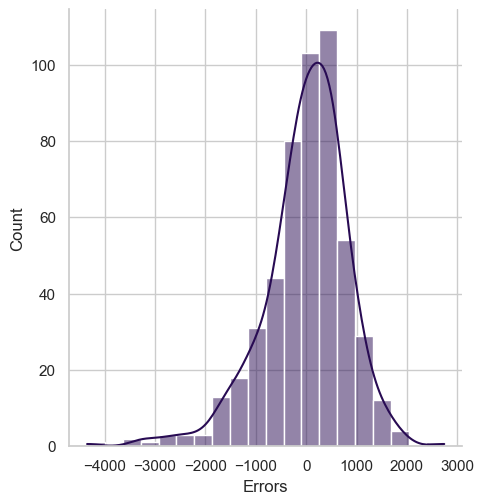

In [132]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

### Infrence:
The error terms follow the principle of a normal distribution curve.

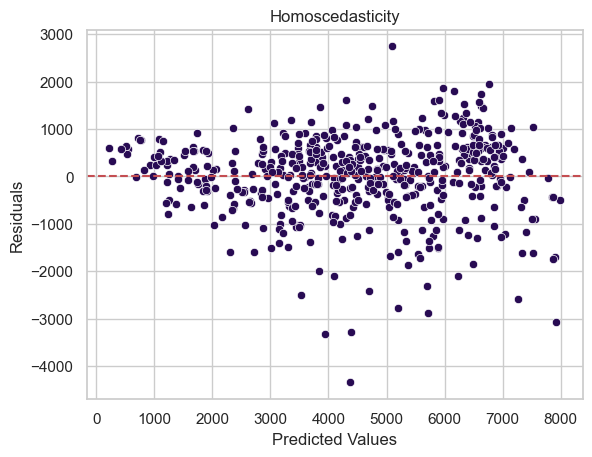

In [134]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

### Infrence:
    The variance of residuals is constant across all levels of the independent variables, indicating consistent levels of variability.

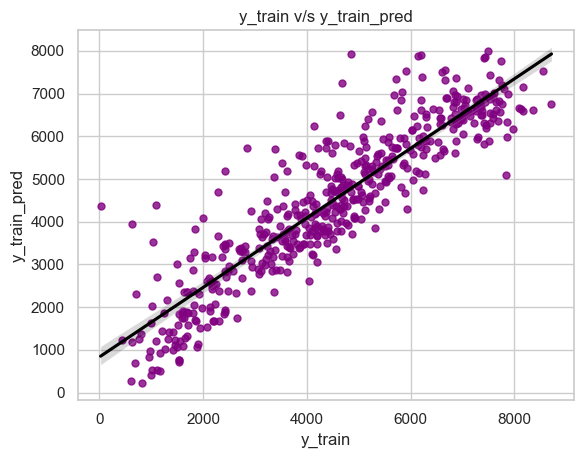

In [135]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'black' }, scatter_kws = { 's' : 25, 'color': 'purple' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

### Infrence: 
    The dependent and independent variables share linear relationship.

In [136]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

841.8830155443754


### Predicting the Final Model on the Test Set

In [137]:
# Retain only the selected feature from the final model
X_test_scaled = X_test_scaled[X_train_rfe_7.columns]
X_test_scaled.head()

,yr,holiday,temp,hum,windspeed,summer,winter,sep,sun
184,-1.01777,6.189321,1.306004,0.048287,-1.396242,-0.572078,-0.575091,-0.295354,-0.408248
535,0.98254,-0.161569,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.295354,-0.408248
299,-1.01777,-0.161569,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.295354,-0.408248
221,-1.01777,-0.161569,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.295354,-0.408248
152,-1.01777,-0.161569,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.295354,-0.408248


In [138]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [139]:
# Get the predicted values from the linear model
y_test_pred = model.predict(X_test_sm)

### Calculating R2 and Adjusted R2 

In [140]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
print("R2 Score Test:", r2_score_test)

R2 Score Test: 0.8


In [141]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

In [142]:
# Calculate Adjusted R2 Score for the test set
adj_r2_score_test = round(adjusted_r2_score(y_test, y_test_pred, n_features = len(X_test_scaled.columns)), 2)
print("Adjusted R2 score test:",adj_r2_score_test)

Adjusted R2 score test: 0.8


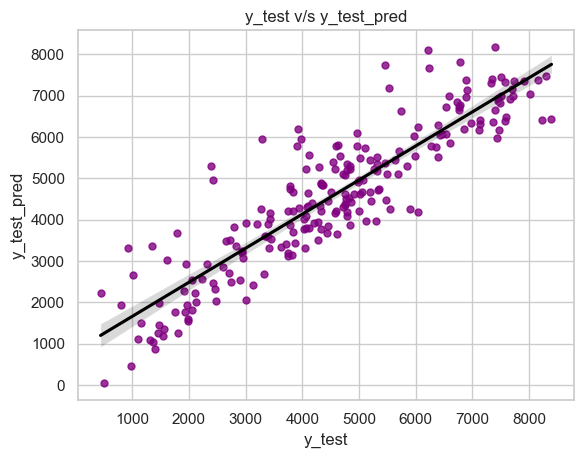

In [143]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'black' }, scatter_kws = { 's' : 25, 'color': 'purple' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

# 10. Evaluation

#### 10.1  Mean Square Error

In [144]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print("Mean Square Test:",rmse_test)

Mean Square Test: 837.8657520624623


In [145]:
# Coefficients of the final model
round(model.params, 2)

const        4491.30
yr            997.29
holiday      -124.38
temp         1170.38
hum          -432.18
windspeed    -347.50
summer        342.30
winter        528.64
sep           239.29
sun          -113.00
dtype: float64

#### 10.2 R2 and Adjusted R2 Score

In [146]:
# Get R2 Score for Training set
r2_score_train = round(model.rsquared, 2)
adj_r2_score_train = round(model.rsquared_adj, 2)

# Print the R2 and Adjusted R2 scores for the training and the test set
print(f'Training Set: \tR2 - {format(r2_score_train, ".3f")}\n\t\tAdjusted R2 - {format(adj_r2_score_train, ".3f")}\n')
print(f'Test Set: \tR2 - {format(r2_score_test, ".3f")}\n\t\tAdjusted R2 - {format(adj_r2_score_test, ".3f")}')

Training Set: 	R2 - 0.810
		Adjusted R2 - 0.810

Test Set: 	R2 - 0.800
		Adjusted R2 - 0.800
